In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import pydot
import pydotplus
import io
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from graphviz import render
from graphviz import Source

from sklearn.tree import export_graphviz

from google.colab import files
uploaded = files.upload()
# read in the file 
wdbc = pd.read_csv(io.BytesIO(uploaded['wdbcwh.csv']))
# Print some basic data info
print(wdbc.describe())
print(wdbc.head())
print(wdbc.shape)
print(wdbc.columns)

Saving wdbcwh.csv to wdbcwh (1).csv
                 ID  Mean_Radius  ...  Worst_Symmetry  Worst_Fractal_Dimension
count  5.690000e+02   569.000000  ...      569.000000               569.000000
mean   3.037183e+07    14.127292  ...        0.290076                 0.083946
std    1.250206e+08     3.524049  ...        0.061867                 0.018061
min    8.670000e+03     6.981000  ...        0.156500                 0.055040
25%    8.692180e+05    11.700000  ...        0.250400                 0.071460
50%    9.060240e+05    13.370000  ...        0.282200                 0.080040
75%    8.813129e+06    15.780000  ...        0.317900                 0.092080
max    9.113205e+08    28.110000  ...        0.663800                 0.207500

[8 rows x 31 columns]
         ID Diagnosis  ...  Worst_Symmetry  Worst_Fractal_Dimension
0    842302         M  ...          0.4601                  0.11890
1    842517         M  ...          0.2750                  0.08902
2  84300903         M  ...

Perform Some Principle Component Analysis (PCA) and Linear Discriminant Analysis (LDA)

Creating the Model for DecisionTreeClassifier()

Choose best options for the model fit

In [22]:
x = wdbc[['Mean_Radius', 'Mean_Texture', 'Mean_Perimeter','Mean_Area', 'Mean_Smoothness', 'Mean_Compactness', 'Mean_Concavity','Mean_Concave_Points', 'Mean_Symmetry', 'Mean_Fractal_Dimension','Radius_SE', 'Texture_SE', 'Perimeter_SE', 'Area_SE', 'Smoothness_SE',
       'Compactness_SE', 'Concavity_SE', 'Concave_Points_SE', 'Symmetry_SE',
       'Fractal_Dimension_SE', 'Worst_Radius', 'Worst_Texture',
       'Worst_Perimeter', 'Worst_Area', 'Worst_Smoothness',
       'Worst_Compactness', 'Worst_Concavity', 'Worst_Concave_Points',
       'Worst_Symmetry', 'Worst_Fractal_Dimension']] # need to decide how many and which are best columns. removed diagnosis column at this point
y = wdbc.Diagnosis

DTC_model = DecisionTreeClassifier()
#Should use our traing subset not the whole dataset
DTC_model.fit(x,y)

#Using the name of the column instead of x[1], x[2], x[3]
export_graphviz(DTC_model, 'tree.dot', feature_names = x.columns)

In [23]:
! dot -Tpng tree.dot -o tree.png

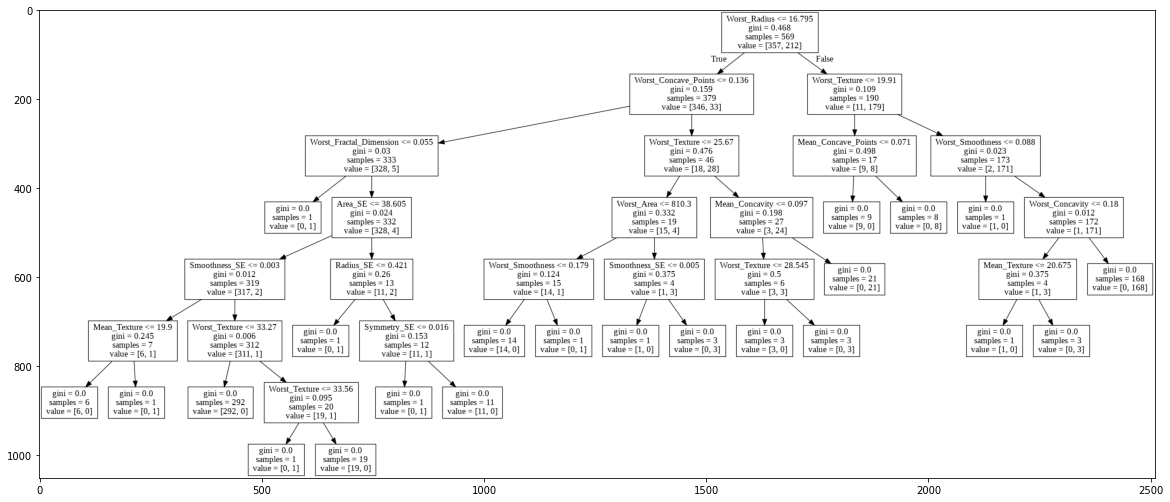

In [24]:
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

The predicticton result for head data, this should really be fresh data not reusing training data 


In [21]:
#When we use our training data above we should use our validation data here to test the predictions
print("Making predictions for the following 5 patients:")
print(x.head())
print("The predictions are")
print(DTC_model.predict(x.head()))

Making predictions for the following 5 patients:
         ID  Mean_Radius  ...  Worst_Symmetry  Worst_Fractal_Dimension
0    842302        17.99  ...          0.4601                  0.11890
1    842517        20.57  ...          0.2750                  0.08902
2  84300903        19.69  ...          0.3613                  0.08758
3  84348301        11.42  ...          0.6638                  0.17300
4  84358402        20.29  ...          0.2364                  0.07678

[5 rows x 31 columns]
The predictions are
['M' 'M' 'M' 'M' 'M']


Creating the Model For DecisionTreeRegression() (Problematic due to M/B classification rather than a series of numeric variables, may not be a viable model for this data)

In [ ]:
#from sklearn.tree import DecisionTreeRegressor
# Define model. Specify a number for random_state to ensure same results each run
#DTR_model = DecisionTreeRegressor(random_state=1)
# Fit model
#DTR_model.fit(x, y)

# Print some predictions
#print("Making predictions for the following 5 patients:")
#print(X.head())
#print("The predictions are")
#print(DTR_model.predict(X.head()))